# **Analisis de regresión lineal simple**

In [ ]:
# @title instala librerías

install.packages("rstatix")

library(rstatix)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




# Visualización de datos

In [ ]:
data <- haven::read_sav("https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase9_BaseRegresionLinealSimpleYMultiple.sav")
data %>% print(n = 10)

# A tibble: 72 × 8
   Código Sexo       Relación HistVinc Afroproblema Afroemoción Estrés_académico
   <chr>  <dbl+lbl>  <dbl+lb>    <dbl>        <dbl>       <dbl>            <dbl>
 1 001    2 [Femeni… 1 [Si]          6         29.2          38               45
 2 002    2 [Femeni… 0 [No]          7         23.8          45               45
 3 003    2 [Femeni… 0 [No]          8         24.6          50               45
 4 004    2 [Femeni… 0 [No]          5         21.5          45               45
 5 005    2 [Femeni… 1 [Si]          8         30            49               44
 6 006    2 [Femeni… 1 [Si]          6         33.1          48               44
 7 007    1 [Mascul… 0 [No]          6         31.5          44               43
 8 008    1 [Mascul… 1 [Si]         11         21.5          36               43
 9 009    2 [Femeni… 0 [No]          8         22.3          35               43
10 010    2 [Femeni… 1 [Si]          8         23.8          32               42
# ℹ 62 mo

`geom_smooth()` using formula = 'y ~ x'


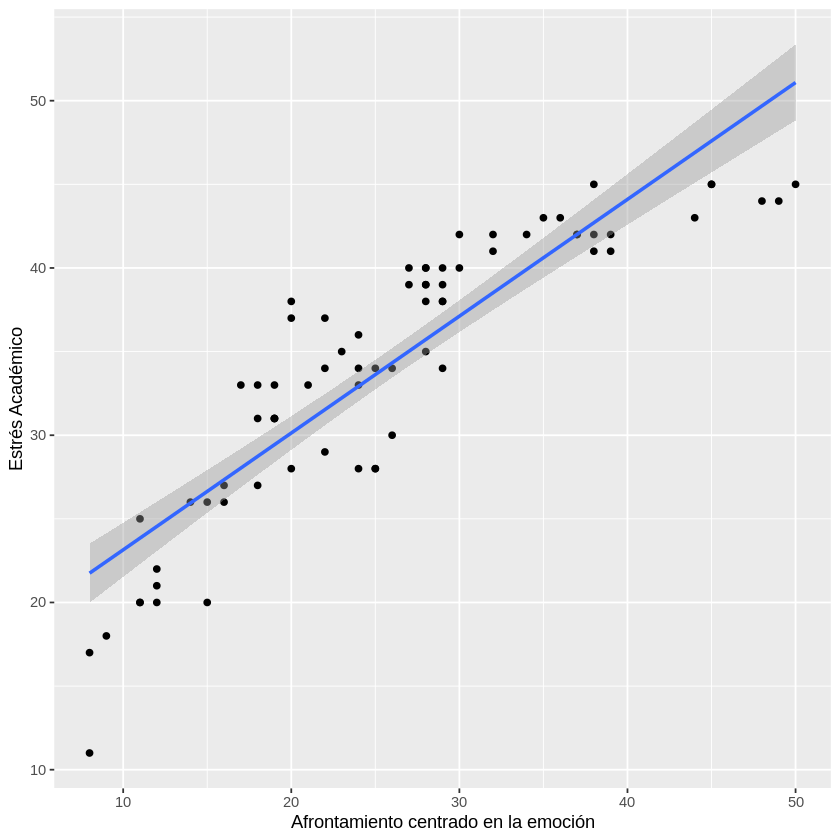

In [ ]:
data %>%
  ggplot(aes(x = Afroemoción, y = Estrés_académico)) +
  geom_point() +
  geom_smooth(method = lm) +
  labs(x = "Afrontamiento centrado en la emoción",
       y = "Estrés Académico")

# Verifcación de supuestos

## Linealidad de la relación

In [ ]:
data %>%
  shapiro_test(Estrés_académico, Afroemoción)

variable,statistic,p
<chr>,<dbl>,<dbl>
Afroemoción,0.9712212,0.097620243
Estrés_académico,0.9359159,0.001187091


In [ ]:
data %>%
  cor_test(Estrés_académico, Afroemoción, method = "spearman")

var1,var2,cor,statistic,p,method
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Estrés_académico,Afroemoción,0.94,3893.535,8.67e-34,Spearman


# Normalidad de residuos

In [ ]:
data %>%
  lm("Estrés_académico ~ Afroemoción", data = .) -> model

In [ ]:
model %>%
  pluck("residuals") %>%
  shapiro_test()

variable,statistic,p.value
<chr>,<dbl>,<dbl>
.,0.9766323,0.2000155


# Evaluación del modelo de regresión

In [ ]:
model %>% broom::glance()

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.7884659,0.785444,3.751251,260.9159,2.607112e-25,1,-196.3399,398.6797,405.5097,985.0321,70,72


In [ ]:
model %>% broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),16.1631126,1.19744827,13.49796,3.662741e-21
Afroemoción,0.6984651,0.04324087,16.15289,2.607112e-25


## Ejercicio 1

Un grupo de investigadores plantea que el afrontamiento centrado en el problema predice un menor estrés académico percibido por los estudiantes. Para evaluar su hipótesis tomaron una muestra de 72 jóvenes a quienes aplicaron el Inventario de Estimación del Afrontamiento y la Escala de Estrés Académico.

- Indica la hipótesis de estudio, la ecuación del modelo de regresión lineal simple y el signo que debiera tener beta (B) si la hipótesis de estudio fuera cierta.
- Evalúa si habría evidencia a favor de una posible relación entre las variables con un diagrama de dispersión.
- Evalúa la correlación entre las variables.
- Estima los parámetros del modelo de regresión.
- Indica la magnitud del coeficiente de determinación e interpreta su valor.
- Realiza el contraste de hipótesis correspondiente y concluir en función a la hipótesis de estudio.

1. Indicar la ecuación del modelo de regresión lineal simple indicando el signo que debiera tener beta (B) si la hipótesis de estudio fuera cierta.

Hipótesis de estudio: El afrontamiento centrado en el problema predice un menor estrés académico percibido por los estudiantes.
- Variable predictora (X): Afrontamiento centrado en el problema    
- Variable de salida (Y): Estrés académico

Ecuación del modelo de regresión lineal simple:
- $EstrésAcadémico = α + β \times AfrontamientoProblema \pm \epsilon $, con $B<0$

`geom_smooth()` using formula = 'y ~ x'


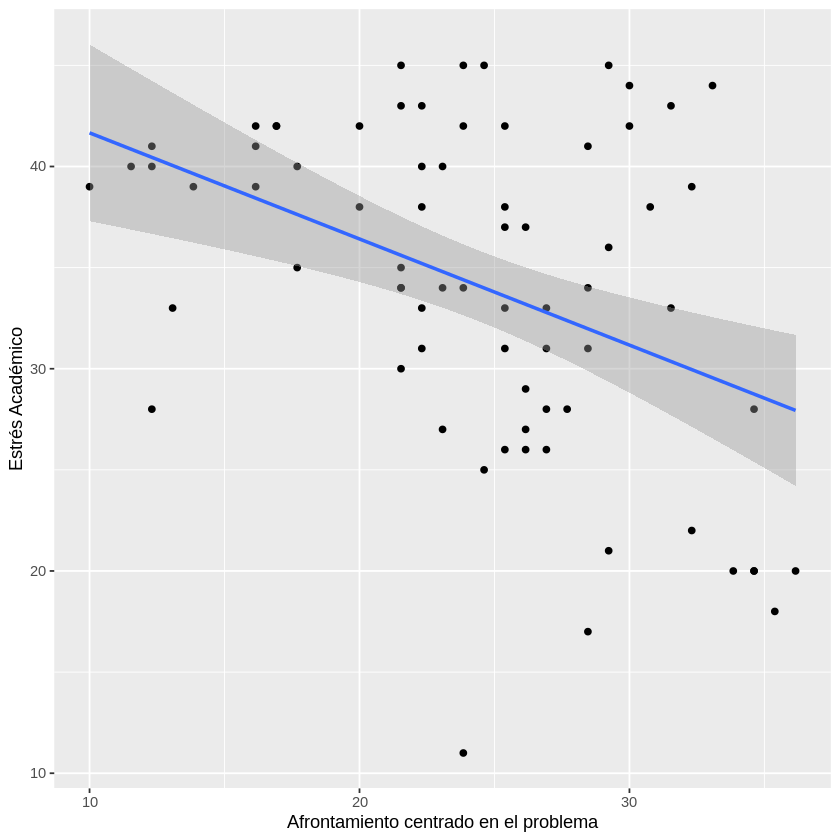

In [ ]:
data %>%
  ggplot(aes(x = Afroproblema, y = Estrés_académico)) +
  geom_point() +
  geom_smooth(method = lm) +
  labs(x = "Afrontamiento centrado en el problema",
       y = "Estrés Académico")

3. Evaluar la correlación entre las variables.  
- H0: rxy = 0
- H1: rxy < 0

Prueba de normalidad para aplicar el coeficiente de correlación pertinente.

In [ ]:
data %>%
  shapiro_test(Estrés_académico, Afroproblema)

variable,statistic,p
<chr>,<dbl>,<dbl>
Afroproblema,0.9741042,0.143365606
Estrés_académico,0.9359159,0.001187091


In [ ]:
data %>%
  cor_test(Afroproblema, Estrés_académico, method = "spearman")

var1,var2,cor,statistic,p,method
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Afroproblema,Estrés_académico,-0.37,85007,0.00153,Spearman


Los resultados del análisis de correlación evidencian que existe una relación estadísticamente significativa, negativa y mediana, según el criterio de Cohen (1988), entre afrontamiento centrado en el problema y estrés académico, r(70) = -.37, p < .001 (unilateral).

4. Estimar los parámetros del modelo de regresión.

In [ ]:
data %>%
  lm("Estrés_académico ~ Afroproblema", data = .) -> model2

In [ ]:
model2 %>% broom::glance()

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.1673226,0.1554272,7.442594,14.06617,0.0003602602,1,-245.6692,497.3385,504.1685,3877.455,70,72


In [ ]:
model2 %>% broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),46.9091849,3.5161263,13.341155,6.621773e-21
Afroproblema,-0.5247145,0.1399056,-3.750489,3.602602e-04


$EstrésAcadémico = 46.909 + -0.525 \times AfrontamientoProblema \pm 7.443 $

5. Indicar la magnitud del coeficiente de determinación e interpretar su valor.

Según Cohen (1988) es un R2 “mediano”. Interpretación: Existe un 16.7% de diferencias en el estrés académico que estarían asociadas al afrontamiento centrado en el problema en los jóvenes estudiantes.

6. Realizar el contraste de hipótesis correspondiente y concluir en función a la hipótesis de estudio.

Hipótesis de estudio: El afrontamiento centrado en el problema predice un menor estrés académico percibido por los estudiantes.
- $H_{0}$: $β = 0$      vs      $H_{1}$: $β < 0$

Se rechaza $H_{0}$, ya que p (unilateral) $.000/2 = <.001$

Luego, como $β = -0.525  < 0$, se  acepta $H_{1}$

Conclusión:
El afrontamiento centrado en el problema predice significativamente un menor estrés académico percibido por los estudiantes,  $β = -0.525$, $EE_{β} = 0$.14, $t(70) = -3.75$, $p <.001$, existiendo entre ambos una relación significativa con un tamaño de efecto mediano, $R^{2} = .167$, $F(1,70) = 14.07$, $p <.001$. Por tanto, se cumple la hipótesis de investigación.